In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#inputfile = "input_test.txt"
inputfile = "input.txt"

In [26]:
with open(inputfile,'r') as f:
    iea = f.readline().replace('.','0').replace('#','1') #image enhancement algorithm

    f.readline() # skip one line

    imglines = f.read().replace('.','0').replace('#','1').splitlines()


In [27]:
iea

'10101000111001011000111111001110010001010101101101010100110010011100010010101010100001101100100001100010010111011101100011110001100001001001010111000101001100101000000010001110011110011001101101110010100011000101110100110011110100000001110001111010100001010101011011011110010010011001000000110000010010100100101101111111100000000010111011111000110100011110100101001000010110001101101011011000000111101110100110100111011001110101110001111110111111100010011000100000001110010111101011110101000000101010100010011100\n'

In [28]:
len(iea)

513

In [29]:
img=[]
for l0 in imglines:
    img0 = [int(char) for char in l0]
    img.append(img0)

In [30]:
img_np = np.array(img)
img_np

array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 0]])

In [31]:
img_np.shape

(100, 100)

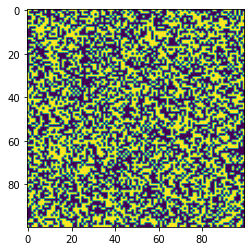

In [32]:
plt.imshow(img_np)

In [33]:
# #We have to consider that image is infinite size.
# #This code is not OK

# img0 = imglines.copy()
# for j in range(1,len(imglines)-1):
#     for i in range(1,len(img[0])-1):
#         #Get the 9 chaaraceters
#         code = imglines[j-1][i-1 : i+2]
#         code+= imglines[j][i-1 : i+2]
#         code+= imglines[j+1][i-1 : i+2]

#         print(f"j={j} ; i={i} ; code= {code}")

#         #get the binary code for it
#         codevalue = int(code, base=2)
#         print(f"codevalue={codevalue}")
#         #get the new value from the translator
#         newimgvalue = iea[codevalue]
#         print(f"newimgvalue={newimgvalue}")
#         img0[j] = img0[j][:i]+newimgvalue+img0[j][i+1:] #Replaces character in the row

#OK

In [34]:
def boollist_to_int(x):
    y = 0
    size = len(x)
    for index,value in enumerate(x):
        y += value<< (size-1-index) #binary shift of value (1 or 0) by index times
    return int(y)

In [35]:
shape0 = img_np.shape
print(shape0)
pad = 4
newshape = [ 2*pad+i for i in shape0] #Padding of 3 on all sides
print(newshape)

img_np1 = np.zeros(newshape, dtype=np.int8)
print(img_np1[pad:-pad,pad:-pad].shape)
img_np1[pad:-pad,pad:-pad] =img_np

(100, 100)
[108, 108]
(100, 100)


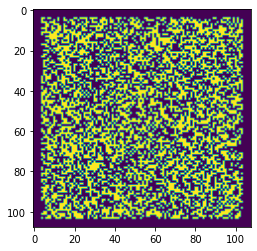

In [36]:
plt.imshow(img_np1)

In [37]:
def applyFilter(img_np0):
    shape0 = img_np0.shape
    pad = 4
    newshape = [ 2*pad+i for i in shape0] #Padding on all sides
    #print(newshape)

    img_np1 = np.zeros(newshape, dtype=np.int8)
    img_np1[pad:-pad,pad:-pad] = img_np0
    
    img_np2 = np.zeros_like(img_np1)
    #Apply enhancement to valid pixels only
    for j in range(0, shape0[0]):
        for i in range(0 , shape0[1]):
            #Get the 3x3 elements around (j,i)
            code_arr = img_np1[pad+j-1:pad+j+2 , pad+i-1:pad+i+2]
            #print(code_arr)
            code_flat = code_arr.flatten()
            #print(code_flat)

            #Create the int from the flattened binary
            codevalue = boollist_to_int(code_flat)
            #print(f"codevalue={codevalue}")
            
            # get the new value from the translator
            newimgvalue = int(iea[codevalue])
            
            #print(f"newimgvalue={newimgvalue}")
            
            img_np2[j+pad,i+pad] = newimgvalue #Replaces value
    return img_np2

In [38]:
def applyFilter2(img_np0):
    shape0 = img_np0.shape
    pad = 2
    newshape = [ 2*pad+i for i in shape0] #Padding on all sides
    #print(newshape)

    img_np1 = np.zeros(newshape, dtype=np.int8)
    img_np1[pad:-pad,pad:-pad] = img_np0
    
    img_np2 = np.zeros_like(img_np1)
    #Apply enhancement to all pixels
    for j in range(1, newshape[0]-1):
        for i in range(1 , newshape[1]-1):
            #Get the 3x3 elements around (j,i)
            code_arr = img_np1[j-1:j+2 , i-1:i+2]
            #print(code_arr)
            code_flat = code_arr.flatten()
            #print(code_flat)

            #Create the int from the flattened binary
            codevalue = boollist_to_int(code_flat)
            #print(f"codevalue={codevalue}")
            
            # get the new value from the translator
            newimgvalue = int(iea[codevalue])
            
            #print(f"newimgvalue={newimgvalue}")
            
            img_np2[j,i] = newimgvalue #Replaces value

    return img_np2

In [43]:
def applyFilter3(img_np0):
    shape0 = img_np0.shape
    pad = 2
    newshape = [ 2*pad+i for i in shape0] #Padding on all sides
    #print(newshape)

    img_np1 = np.zeros(newshape, dtype=np.int8)
    img_np1[pad:-pad,pad:-pad] = img_np0

    img_res = np.zeros_like(img_np1)
    #Apply enhancement to all pixels
    for j in range(1, newshape[0]-1):
        for i in range(1 , newshape[1]-1):
            #Get the 3x3 elements around (j,i)
            code_arr = img_np1[j-1:j+2 , i-1:i+2]
            #print(code_arr)
            code_flat = code_arr.flatten()
            #print(code_flat)

            #Create the int from the flattened binary
            codevalue = boollist_to_int(code_flat)
            #print(f"codevalue={codevalue}")
            
            # get the new value from the translator
            newimgvalue = int(iea[codevalue])
            
            #print(f"newimgvalue={newimgvalue}")
            
            img_res[j,i] = newimgvalue #Replaces value
    
    #crops last rows and columns
    #img_np2 = img_np2[1:-1 , 1:-1]
    return img_res

In [57]:
def applyFilter4(img_np0,iteration):
    shape0 = img_np0.shape
    pad = 2
    newshape = [ 2*pad+i for i in shape0] #Padding on all sides
    #print(newshape)

    img_np1 = np.zeros(newshape, dtype=np.int8)
    img_np1[pad:-pad,pad:-pad] = img_np0
    
    #Whether the outside of the calculation area is zeros or not depends
    #iea (algorithm) first element
    img_res = None
    if iteration%2 ==0:
        img_res = np.ones_like(img_np1)
    else:
        img_res = np.zeros_like(img_np1)

    #Apply enhancement to all pixels
    for j in range(1, newshape[0]-1):
        for i in range(1 , newshape[1]-1):
            #Get the 3x3 elements around (j,i)
            code_arr = img_np1[j-1:j+2 , i-1:i+2]
            #print(code_arr)
            code_flat = code_arr.flatten()
            #print(code_flat)

            #Create the int from the flattened binary
            codevalue = boollist_to_int(code_flat)
            #print(f"codevalue={codevalue}")
            
            # get the new value from the translator
            newimgvalue = int(iea[codevalue])
            
            #print(f"newimgvalue={newimgvalue}")
            
            img_res[j,i] = newimgvalue #Replaces value
    
    #crops last rows and columns
    img_res = img_res[1:-1 , 1:-1]
    return img_res

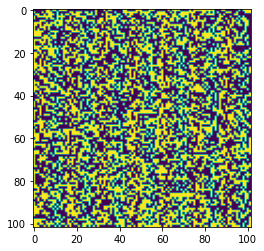

In [58]:
img1 = applyFilter4(img_np,1)
plt.imshow(img1)

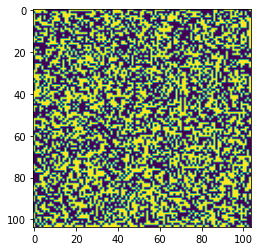

In [59]:
img2 = applyFilter4(img1,2)
plt.imshow(img2)
#OK

In [60]:
np.sum(img2)

5285

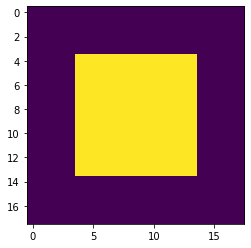

In [46]:
#Test
imgtest = applyFilter(np.zeros((10,10),dtype=np.int8))
plt.imshow(imgtest) #inverts if it is all zeros

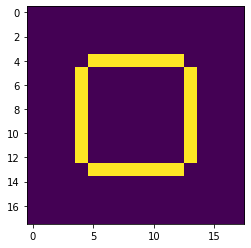

In [47]:
#Test
imgtest = applyFilter(np.ones((10,10),dtype=np.int8))
plt.imshow(imgtest) #inverts if it is all ones
#This means that if the image is infinite we will see inversion of the outside